In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
boston = load_boston()
X = boston.data
y = boston.target

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
cols = ['Price', 'LSTAT', 'INDUS', 'RM', 'AGE']

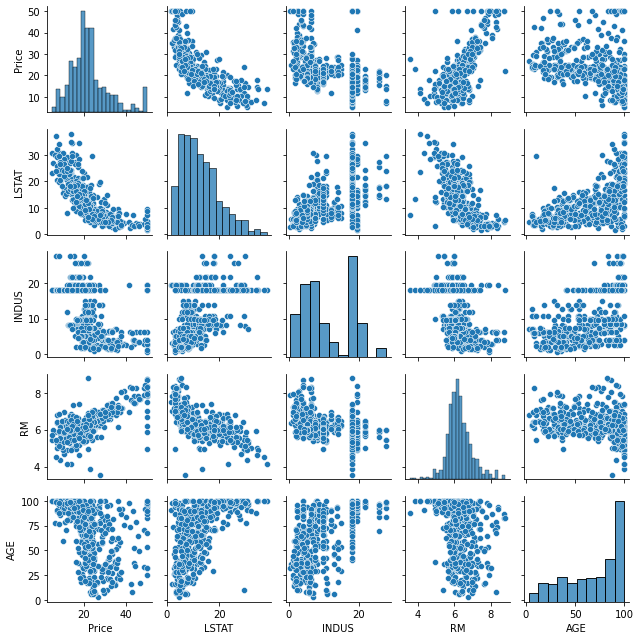

In [8]:
sns.pairplot(df[cols], height=1.8)
plt.tight_layout()

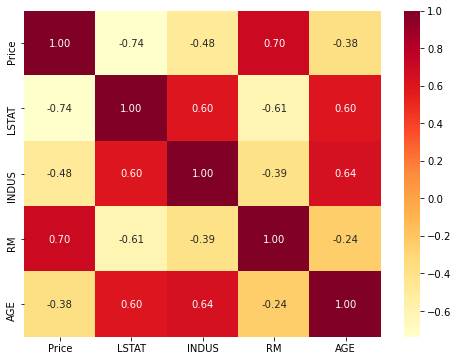

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', cmap="YlOrRd", yticklabels=cols, xticklabels=cols)

## <font color=black>**Multiple Linear Regression** </font>

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X, y)

LinearRegression()

In [12]:
pred = lr.predict(X)

Text(0.5, 1.0, 'Histogram for Predicted prices')

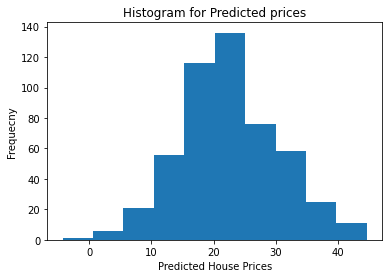

In [13]:
# Histogram: Plot a histogram of all the predicted prices
plt.hist(pred)
plt.xlabel('Predicted House Prices')
plt.ylabel('Frequecny')
plt.title('Histogram for Predicted prices')

## Homoscedasticity and Normality:
#### The error variance should be constant, which is known as homocesdasticity and the error should be normally distributed.

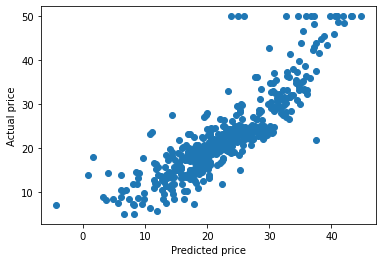

In [14]:
plt.scatter(pred, y)
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.show()

## Plotting residuals

<AxesSubplot:>

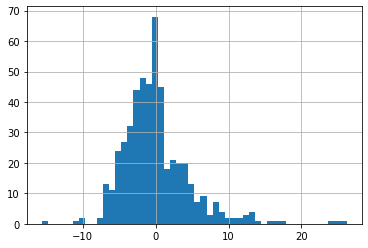

In [15]:
pd.Series(y-pred).hist(bins=50)

In [16]:
lr.intercept_

36.459488385089855

In [17]:
r2 = r2_score(y, pred)
print("R2 on test data: {:.2}".format(r2))

R2 on test data: 0.74


## Cross Validation:

In [18]:
from sklearn.model_selection import cross_val_predict

In [19]:
pred_cv = cross_val_predict(lr, X, y, cv=10)

<AxesSubplot:>

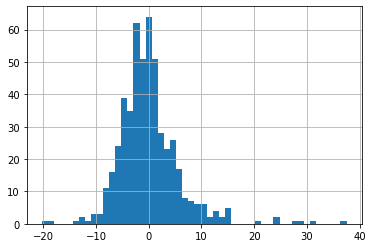

In [20]:
pd.Series(y-pred_cv).hist(bins=50)

## Q-Q plot to test if data is normally distributed

In [21]:
from scipy.stats import probplot
#We will plot our data against a normal distribution to test if our data is distributed normally.

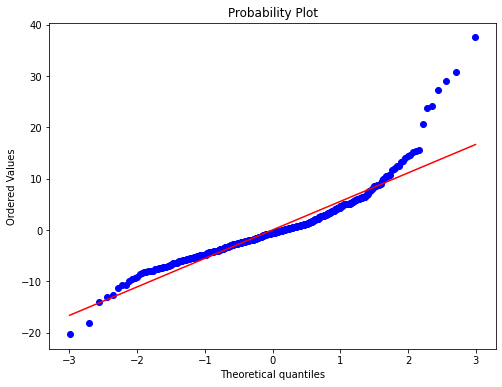

In [22]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
qq = probplot(y - pred_cv, plot=ax)

## MAE and MSE:

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
print("Mean absolute error(MAE):", mean_absolute_error(y, pred_cv))

Mean absolute error(MAE): 3.997305852593228


In [25]:
print("Mean squared error(MSE):", mean_squared_error(y, pred_cv))

Mean squared error(MSE): 34.53965953999315


In [26]:
print("Mean absolute error(MAE):", mean_absolute_error(y, pred))

Mean absolute error(MAE): 3.2708628109003115


In [27]:
print("Mean squared error(MSE):", mean_squared_error(y, pred))

Mean squared error(MSE): 21.894831181729202
